In [1]:
# To be run on Google Colab!
!mkdir -p utoronto/edu/ca/
!wget --directory-prefix=utoronto/edu/ca/  https://raw.githubusercontent.com/rbouadjenek/SIGIR22_LMRec/main/utoronto/edu/ca/metrics.py   > /dev/null 2> /dev/null 
!wget --directory-prefix=utoronto/edu/ca/  https://raw.githubusercontent.com/rbouadjenek/SIGIR22_LMRec/main/utoronto/edu/ca/data.py   > /dev/null 2> /dev/null 
!wget --directory-prefix=utoronto/edu/ca/ https://raw.githubusercontent.com/rbouadjenek/SIGIR22_LMRec/main/utoronto/edu/ca/models.py  > /dev/null 2> /dev/null 
!wget --directory-prefix=utoronto/edu/ca/ https://raw.githubusercontent.com/rbouadjenek/SIGIR22_LMRec/main/utoronto/edu/ca/utils.py  > /dev/null 2> /dev/null 
!wget --directory-prefix=utoronto/edu/ca/ https://raw.githubusercontent.com/rbouadjenek/SIGIR22_LMRec/main/utoronto/edu/ca/__init__.py  > /dev/null 2> /dev/null 
!wget --directory-prefix=utoronto/edu/ https://raw.githubusercontent.com/rbouadjenek/SIGIR22_LMRec/main/utoronto/edu/ca/__init__.py  > /dev/null 2> /dev/null 
!wget --directory-prefix=utoronto/ https://raw.githubusercontent.com/rbouadjenek/SIGIR22_LMRec/main/utoronto/edu/ca/__init__.py  > /dev/null 2> /dev/null 
!wget --directory-prefix=./ https://raw.githubusercontent.com/rbouadjenek/SIGIR22_LMRec/main/names.txt  > /dev/null 2> /dev/null 
!pip install tokenizers transformers > /dev/null 2> /dev/null 

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow import keras
from utoronto.edu.ca.data import Dataset
import utoronto.edu.ca.models as models
import utoronto.edu.ca.utils as utils
import utoronto.edu.ca.metrics as metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pickle


%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext tensorboard


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
yelp_cities = ['atlanta',
               'austin',
               'boston',
               'columbus',
               'orlando',
               'portland',
               'toronto'
]

In [4]:
predictions = {}
ground_truth = {}
predictions_neut = {}
ground_truth_neut = {}
for city in yelp_cities: 
    # # Load data
    dataset = Dataset(city)
    ground_truth[city] = dataset.y_test  
    # Create the model
    model = models.get_model(dataset.max_len, dataset.num_labels, tpu=False)
    data_url = 'http://206.12.93.90:8080/yelp_data/models/saved_weights_' + dataset.dataset + '.h5'
    file_name = keras.utils.get_file('saved_weights_' + dataset.dataset + '.h5', data_url, untar=False)  
    model.load_weights(file_name)
    # Make predictions
    preds = model.predict(dataset.X_test, verbose=1, batch_size=128)
    predictions[city] = preds
    # Load data neut
    dataset = Dataset(city,  masking=True)
    ground_truth_neut[city] = dataset.y_test
    # Create the model
    model = models.get_model(dataset.max_len, dataset.num_labels, tpu=False)
    data_url = 'http://206.12.93.90:8080/yelp_data/models/saved_weights_' + dataset.dataset + '_neut.h5'
    file_name = keras.utils.get_file('saved_weights_' + dataset.dataset + '_neut.h5', data_url, untar=False)  
    model.load_weights(file_name)
    # Make predictions neut
    preds_neut = model.predict(dataset.X_test, verbose=1, batch_size=128)
    predictions_neut[city] = preds_neut


204447744/204431505 [==============================] - 10s 0us/step
Data in:  /root/.keras/datasets/Atlanta_reviews.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
100%|██████████| 587547/587547 [00:00<00:00, 1377606.53it/s]


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 587547/587547 [21:47<00:00, 449.39it/s]


Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


267689984/267679931 [==============================] - 13s 0us/step
Data in:  /root/.keras/datasets/Austin_reviews.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
100%|██████████| 786564/786564 [31:55<00:00, 410.71it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of

180805632/180790154 [==============================] - 9s 0us/step
Data in:  /root/.keras/datasets/Boston_reviews.csv


100%|██████████| 521596/521596 [21:54<00:00, 396.81it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


66486272/66470604 [==============================] - 4s 0us/step
Data in:  /root/.keras/datasets/Columbus_reviews.csv


100%|██████████| 198099/198099 [07:06<00:00, 464.75it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


143826944/143817024 [==============================] - 7s 0us/step
Data in:  /root/.keras/datasets/Orlando_reviews.csv


100%|██████████| 440949/440949 [16:12<00:00, 453.36it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


241287168/241277594 [==============================] - 11s 0us/step
Data in:  /root/.keras/datasets/Portland_reviews.csv


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):
100%|██████████| 736725/736725 [31:13<00:00, 393.30it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of

126754816/126743106 [==============================] - 6s 0us/step
Data in:  /root/.keras/datasets/Toronto_reviews.csv


100%|██████████| 402927/402927 [09:50<00:00, 682.80it/s]
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


180/180 [==============================] - 352s 2s/step


In [5]:
with open('predictions.pickle', 'wb') as file:
        pickle.dump(predictions, file)
with open('ground_truth.pickle', 'wb') as file:
        pickle.dump(ground_truth, file)
with open('predictions_neut.pickle', 'wb') as file:
        pickle.dump(predictions_neut, file)
with open('ground_truth_neut.pickle', 'wb') as file:
        pickle.dump(ground_truth_neut, file)

!cp *.pickle /content/drive/MyDrive/


In [6]:
!cp /content/drive/MyDrive/ground_truth.pickle .
!cp /content/drive/MyDrive/predictions.pickle .
!cp /content/drive/MyDrive/ground_truth_neut.pickle .
!cp /content/drive/MyDrive/predictions_neut.pickle .


In [8]:
with open('ground_truth.pickle', 'rb') as file:
    ground_truth = pickle.load(file)
with open('predictions.pickle', 'rb') as file:
    predictions = pickle.load(file)
with open('ground_truth_neut.pickle', 'rb') as file:
    ground_truth_neut = pickle.load(file)
with open('predictions_neut.pickle', 'rb') as file:
    predictions_neut = pickle.load(file)
    


In [10]:
data = pd.DataFrame(columns=['City','Precision', 'Recall', 'F1-Score', 
                             'Accuracy', 'Accuracy_err', 'MRR', 'MRR_err', 
                             'HR@5', 'HR@5_err', 'HR@10', 'HR@10_err', 
                             'HR@20', 'HR@20_err'])
for city in predictions.keys():
    y_true = ground_truth[city]
    y_pred = predictions[city]
    performance = metrics.get_performance(y_true, y_pred)
    data = data.append(pd.DataFrame([[city,
                                      performance['Precision'],
                                      performance['Recall'],
                                      performance['F1-Score'],
                                      performance['Accuracy'][0], performance['Accuracy'][1],
                                      performance['MRR'][0], performance['MRR'][1],
                                      performance['HR@5'][0], performance['HR@5'][1],
                                      performance['HR@10'][0], performance['HR@10'][1],
                                      performance['HR@20'][0], performance['HR@20'][1]]],
                                    columns=['City','Precision', 'Recall', 'F1-Score', 
                                             'Accuracy', 'Accuracy_err', 'MRR', 'MRR_err', 
                                             'HR@5', 'HR@5_err', 'HR@10', 'HR@10_err', 
                                             'HR@20', 'HR@20_err']),ignore_index=True)
    
data


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision 

,City,Precision,Recall,F1-Score,Accuracy,Accuracy_err,MRR,MRR_err,HR@5,HR@5_err,HR@10,HR@10_err,HR@20,HR@20_err
0,atlanta,0.496384,0.479702,0.476190,0.479702,0.004231,0.571248,0.003662,0.675418,0.003966,0.740439,0.003713,0.798159,0.003400
1,austin,0.480759,0.467401,0.457266,0.467401,0.003595,0.565556,0.003088,0.677794,0.003367,0.746723,0.003134,0.806771,0.002845
2,boston,0.546226,0.531794,0.528683,0.531794,0.004550,0.618438,0.003880,0.717167,0.004107,0.777703,0.003791,0.833045,0.003401
3,columbus,0.498933,0.467548,0.467278,0.467548,0.007461,0.560493,0.006475,0.665347,0.007056,0.730077,0.006638,0.789219,0.006099
4,orlando,0.493924,0.476533,0.474693,0.476533,0.004932,0.567957,0.004269,0.672877,0.004633,0.741414,0.004324,0.800736,0.003945
5,portland,0.480539,0.466199,0.458855,0.466199,0.003724,0.557747,0.003239,0.660580,0.003535,0.727443,0.003324,0.788287,0.003049
6,toronto,0.534719,0.505286,0.506323,0.505286,0.006464,0.603946,0.005441,0.718991,0.005811,0.787644,0.005287,0.845203,0.004676


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [11]:
data_neut = pd.DataFrame(columns=['City','Precision', 'Recall', 'F1-Score', 
                             'Accuracy', 'Accuracy_err', 'MRR', 'MRR_err', 
                             'HR@5', 'HR@5_err', 'HR@10', 'HR@10_err', 
                             'HR@20', 'HR@20_err'])
for city in predictions_neut.keys():
    y_true = ground_truth_neut[city]
    y_pred = predictions_neut[city]
    performance = metrics.get_performance(y_true, y_pred)
    data_neut = data_neut.append(pd.DataFrame([[city,
                                                performance['Precision'],
                                                performance['Recall'],
                                                performance['F1-Score'],
                                                performance['Accuracy'][0], performance['Accuracy'][1],
                                                performance['MRR'][0], performance['MRR'][1],
                                                performance['HR@5'][0], performance['HR@5'][1],
                                                performance['HR@10'][0], performance['HR@10'][1],
                                                performance['HR@20'][0], performance['HR@20'][1]]],
                                                columns=['City','Precision', 'Recall', 'F1-Score', 
                                                        'Accuracy', 'Accuracy_err', 'MRR', 'MRR_err', 
                                                        'HR@5', 'HR@5_err', 'HR@10', 'HR@10_err', 
                                                        'HR@20', 'HR@20_err']),ignore_index=True)
    
data_neut


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision 

,City,Precision,Recall,F1-Score,Accuracy,Accuracy_err,MRR,MRR_err,HR@5,HR@5_err,HR@10,HR@10_err,HR@20,HR@20_err
0,atlanta,0.465403,0.454978,0.449657,0.454978,0.004218,0.546281,0.003689,0.648827,0.004043,0.715566,0.003821,0.776442,0.003529
1,austin,0.456637,0.440668,0.436415,0.440654,0.003577,0.540062,0.003101,0.653332,0.003429,0.726098,0.003213,0.789607,0.002937
2,boston,0.525683,0.505151,0.503664,0.505151,0.004559,0.595992,0.003901,0.700502,0.004177,0.764414,0.003870,0.822245,0.003486
3,columbus,0.458456,0.439432,0.435303,0.439432,0.007422,0.537259,0.006454,0.649630,0.007134,0.718959,0.006722,0.783107,0.006163
4,orlando,0.470094,0.453002,0.451081,0.453002,0.004916,0.548947,0.004263,0.658967,0.004681,0.729890,0.004385,0.792233,0.004006
5,portland,0.451928,0.439149,0.432518,0.439149,0.003704,0.531511,0.003251,0.634052,0.003596,0.705252,0.003403,0.771230,0.003135
6,toronto,0.513133,0.488492,0.486309,0.488492,0.006462,0.589210,0.005460,0.709724,0.005868,0.779726,0.005358,0.836285,0.004784


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


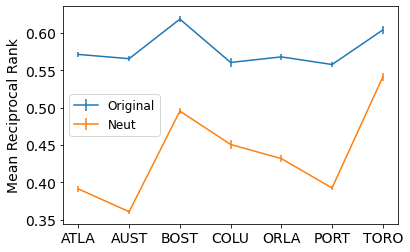

In [ ]:
plt.figure(figsize=(6,4))
x = np.array(range(len(data['City'])))
y = np.array(data['MRR'])
yerr = np.array(data['MRR_err'])
plt.errorbar(x, y, yerr=yerr, label='Original')

y = np.array(data_neut['MRR'])
yerr = np.array(data_neut['MRR_err'])
plt.errorbar(x, y, yerr=yerr, label='Neut')
plt.ylabel("Mean Reciprocal Rank")
plt.legend(loc='lower right')
plt.tick_params(labelsize=14)
plt.gca().legend().set_title('')
params = {'legend.fontsize': 'large',
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'axes.grid': False,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.xticks(x, np.array([x[:4].upper() for x in data['City']]))
plt.savefig('mrr.eps', bbox_inches = 'tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


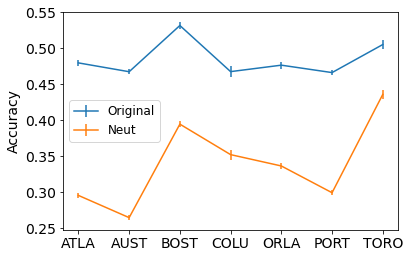

In [ ]:
plt.figure(figsize=(6,4))
x = np.array(range(len(data['City'])))
y = np.array(data['Accuracy'])
yerr = np.array(data['Accuracy_err'])
plt.errorbar(x, y, yerr=yerr, label='Original')

y = np.array(data_neut['Accuracy'])
yerr = np.array(data_neut['Accuracy_err'])
plt.errorbar(x, y, yerr=yerr, label='Neut')
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.tick_params(labelsize=14)
plt.gca().legend().set_title('')
params = {'legend.fontsize': 'large',
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'axes.grid': False,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.xticks(x, np.array([x[:4].upper() for x in data['City']]))
plt.savefig('accuracy.eps', bbox_inches = 'tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


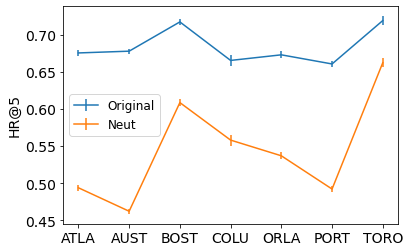

In [ ]:
plt.figure(figsize=(6,4))
x = np.array(range(len(data['City'])))
y = np.array(data['HR@5'])
yerr = np.array(data['HR@5_err'])
plt.errorbar(x, y, yerr=yerr, label='Original')

y = np.array(data_neut['HR@5'])
yerr = np.array(data_neut['HR@5_err'])
plt.errorbar(x, y, yerr=yerr, label='Neut')
plt.ylabel("HR@5")
plt.legend(loc='lower right')
plt.tick_params(labelsize=14)
plt.gca().legend().set_title('')
params = {'legend.fontsize': 'large',
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'axes.grid': False,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.xticks(x, np.array([x[:4].upper() for x in data['City']]))
plt.savefig('HR5.eps', bbox_inches = 'tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


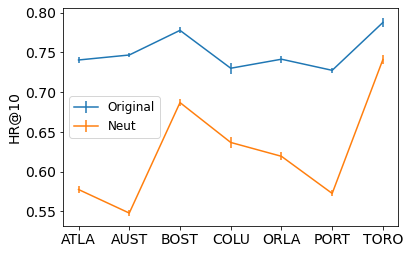

In [ ]:
plt.figure(figsize=(6,4))
x = np.array(range(len(data['City'])))
y = np.array(data['HR@10'])
yerr = np.array(data['HR@10_err'])
plt.errorbar(x, y, yerr=yerr, label='Original')

y = np.array(data_neut['HR@10'])
yerr = np.array(data_neut['HR@10_err'])
plt.errorbar(x, y, yerr=yerr, label='Neut')
plt.ylabel("HR@10")
plt.legend(loc='lower right')
plt.tick_params(labelsize=14)
plt.gca().legend().set_title('')
params = {'legend.fontsize': 'large',
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'axes.grid': False,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.xticks(x, np.array([x[:4].upper() for x in data['City']]))
plt.savefig('HR10.eps', bbox_inches = 'tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


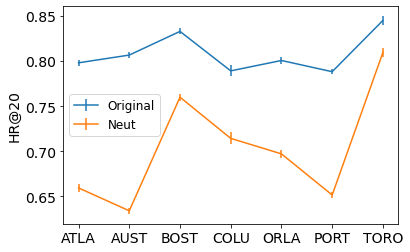

In [ ]:
plt.figure(figsize=(6,4))
x = np.array(range(len(data['City'])))
y = np.array(data['HR@20'])
yerr = np.array(data['HR@20_err'])
plt.errorbar(x, y, yerr=yerr, label='Original')

y = np.array(data_neut['HR@20'])
yerr = np.array(data_neut['HR@20_err'])
plt.errorbar(x, y, yerr=yerr, label='Neut')
plt.ylabel("HR@20")
plt.legend(loc='lower right')
plt.tick_params(labelsize=14)
plt.gca().legend().set_title('')
params = {'legend.fontsize': 'large',
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'axes.grid': False,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.xticks(x, np.array([x[:4].upper() for x in data['City']]))
plt.savefig('HR20.eps', bbox_inches = 'tight')
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


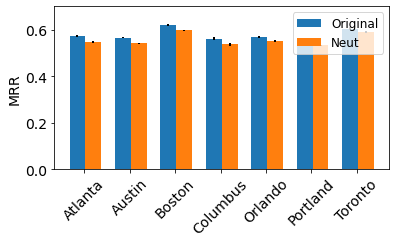

In [23]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

## necessary variables
width = 0.35                      # the width of the bars

## the bars
x = np.array(range(len(data['City'])))
y = np.array(data['MRR'])
yerr = np.array(data['MRR_err'])
rects1 = ax.bar(x, y, width,
                yerr=yerr,
                error_kw=dict(elinewidth=2,ecolor='black'))

y = np.array(data_neut['MRR'])
yerr = np.array(data_neut['MRR_err'])
rects2 = ax.bar(x+width, y, width,
                    yerr=yerr,
                    error_kw=dict(elinewidth=2,ecolor='black'))

# axes and labels
ax.set_ylim(0,0.7)
ax.set_ylabel('MRR')
plt.xticks(x+0.15, np.array([x.capitalize() for x in data['City']]), rotation=45)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Original', 'Neut') )
params = {'legend.fontsize': 'large',
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'axes.grid': False,
          'axes.titlepad': 25}
plt.rcParams.update(params)
plt.savefig('mrr_histo.eps', bbox_inches = 'tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


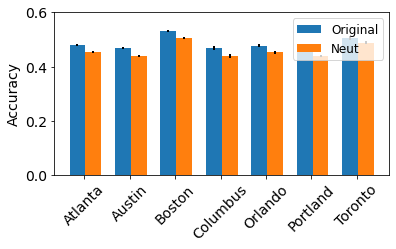

In [24]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

## necessary variables
width = 0.35                      # the width of the bars

## the bars
x = np.array(range(len(data['City'])))
y = np.array(data['Accuracy'])
yerr = np.array(data['Accuracy_err'])
rects1 = ax.bar(x, y, width,
                yerr=yerr,
                error_kw=dict(elinewidth=2,ecolor='black'))

y = np.array(data_neut['Accuracy'])
yerr = np.array(data_neut['Accuracy_err'])
rects2 = ax.bar(x+width, y, width,
                    yerr=yerr,
                    error_kw=dict(elinewidth=2,ecolor='black'))

# axes and labels
ax.set_ylim(0,0.6)
ax.set_ylabel('Accuracy')
plt.xticks(x+0.15, np.array([x.capitalize() for x in data['City']]), rotation=45)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Original', 'Neut') )
plt.savefig('accuracy_histo.eps', bbox_inches = 'tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


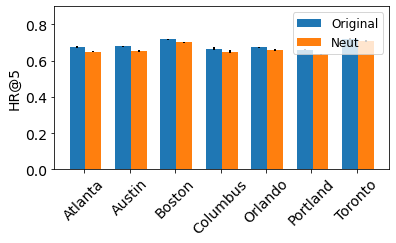

In [25]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

## necessary variables
width = 0.35                      # the width of the bars

## the bars
x = np.array(range(len(data['City'])))
y = np.array(data['HR@5'])
yerr = np.array(data['HR@5_err'])
rects1 = ax.bar(x, y, width,
                yerr=yerr,
                error_kw=dict(elinewidth=2,ecolor='black'))

y = np.array(data_neut['HR@5'])
yerr = np.array(data_neut['HR@5_err'])
rects2 = ax.bar(x+width, y, width,
                    yerr=yerr,
                    error_kw=dict(elinewidth=2,ecolor='black'))

# axes and labels
ax.set_ylim(0,0.9)
ax.set_ylabel('HR@5')
plt.xticks(x+0.15, np.array([x.capitalize() for x in data['City']]), rotation=45)


## add a legend
ax.legend( (rects1[0], rects2[0]), ('Original', 'Neut') )
plt.savefig('HR5_histo.eps', bbox_inches = 'tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


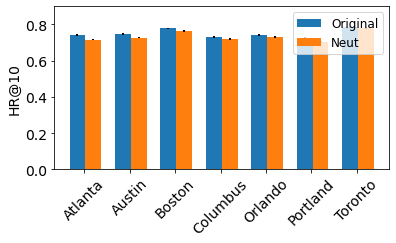

In [26]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

## necessary variables
width = 0.35                      # the width of the bars

## the bars
x = np.array(range(len(data['City'])))
y = np.array(data['HR@10'])
yerr = np.array(data['HR@10_err'])
rects1 = ax.bar(x, y, width,
                yerr=yerr,
                error_kw=dict(elinewidth=2,ecolor='black'))

y = np.array(data_neut['HR@10'])
yerr = np.array(data_neut['HR@10_err'])
rects2 = ax.bar(x+width, y, width,
                    yerr=yerr,
                    error_kw=dict(elinewidth=2,ecolor='black'))

# axes and labels
ax.set_ylim(0,0.9)
ax.set_ylabel('HR@10')
plt.xticks(x+0.15, np.array([x.capitalize() for x in data['City']]), rotation=45)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Original', 'Neut') )
plt.savefig('HR10_histo.eps', bbox_inches = 'tight')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


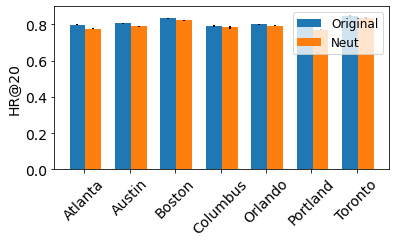

In [27]:
fig = plt.figure(figsize=(6,3))
ax = fig.add_subplot(111)

## necessary variables
width = 0.35                      # the width of the bars

## the bars
x = np.array(range(len(data['City'])))
y = np.array(data['HR@20'])
yerr = np.array(data['HR@20_err'])
rects1 = ax.bar(x, y, width,
                yerr=yerr,
                error_kw=dict(elinewidth=2,ecolor='black'))

y = np.array(data_neut['HR@20'])
yerr = np.array(data_neut['HR@20_err'])
rects2 = ax.bar(x+width, y, width,
                    yerr=yerr,
                    error_kw=dict(elinewidth=2,ecolor='black'))

# axes and labels
ax.set_ylim(0,0.9)
ax.set_ylabel('HR@20')
plt.xticks(x+0.15, np.array([x.capitalize() for x in data['City']]), rotation=45)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('Original', 'Neut') )
plt.savefig('HR20_histo.eps', bbox_inches = 'tight')

plt.show()